# Watch Out for the Sharpe Ratio!

Sharpe Ratio is one of the top metrics used by traders and investors to evaluate their trading strategy/investment systems. This notebook accompanies the Blogpost (Link???) to illustrate the importance of using rigorous approaches to evaluate our trading strategies, at least not relying on a single performance metric alone. 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime, timedelta

In [32]:
# Download the Adjusted Close data for AMZN
pep = pdr.get_data_yahoo('AMZN')['Adj Close']

### Constructing the backtest

__Buy and hold strategy__

In [33]:
# This indicates whether we have a position on or not
inpos = 0

# Hold for 60 days
hold_period = timedelta(60)

wait = 0

# This is the PnL
pnl = []
pos = []
time_in_trade = []

In [34]:
for date in pep.index:
    
    if inpos == 0 and wait == 2:
        entry_price = pep[date]
        open_time = date
        inpos = 1
        
    elif inpos == 1 and date-open_time >= hold_period:
        #Profit/loss for this trade
        p = pep[date] - entry_price
        pnl.append(p)
        inpos = 0
    
    elif inpos == 0 and wait < 2:
        wait += 1
        
    pos.append(inpos)

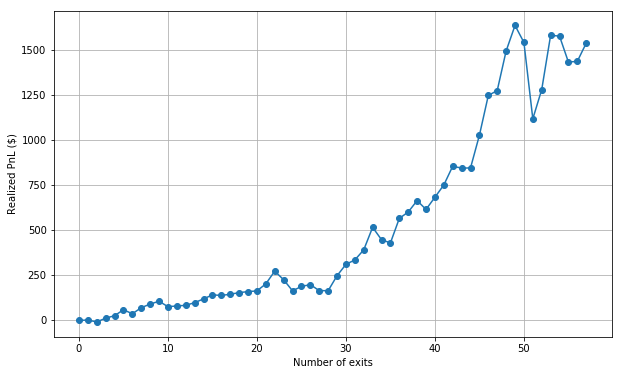

In [35]:
# Cumulative profit per trade
fig = plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pnl),'-o')
plt.xlabel('Number of exits')
plt.ylabel('Realized PnL ($)')
plt.grid()
plt.show()

__Daily return__

In [36]:
# Daily return
pos1 = [0] + pos 
daily_ret = pep.pct_change()*pos1[:-1]

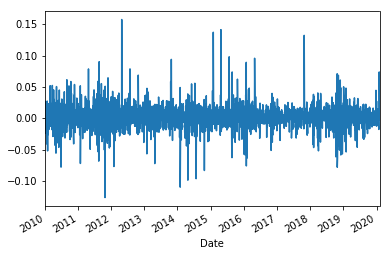

In [37]:
daily_ret.plot()
plt.show()

### Sharpe Ratio

In [38]:
# Annualised Sharpe ratio
sharpe = np.mean(daily_ret)/np.std(daily_ret)*np.sqrt(252)
sharpe

0.9810107106001134

### Profit per trade

In [39]:
pnl_sort = sorted(pnl)

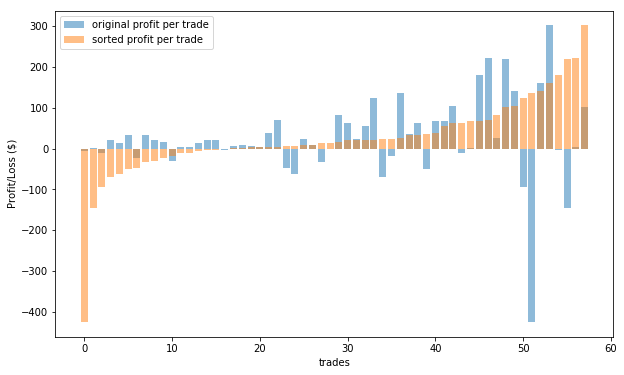

In [40]:
# Plotting profit per trade
fig = plt.figure(figsize=(10, 6))
x = range(len(pnl))
plt.bar(x, pnl, alpha=0.5)
plt.bar(x, pnl_sort, alpha=0.5)
plt.ylabel('Profit/Loss ($)')
plt.xlabel('trades')
plt.legend(['original profit per trade', 'sorted profit per trade'])
plt.show()

In [41]:
pnl = [0] + pnl
pnl_sort = [0] + pnl_sort

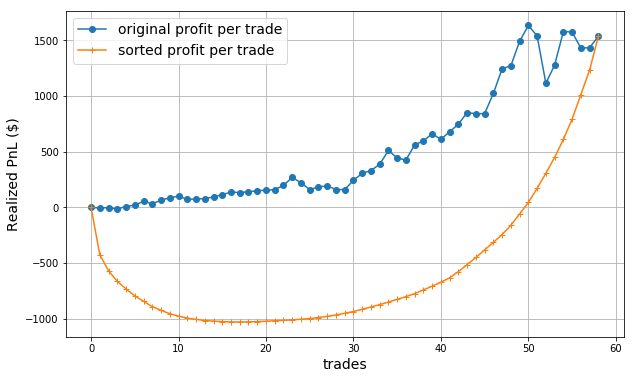

In [42]:
# Cumulative profit per trade
fig = plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pnl),'-o')
plt.plot(np.cumsum(pnl_sort),'-+')
plt.legend(['original profit per trade', 'sorted profit per trade'], fontsize=14)
plt.xlabel('trades', fontsize=14)
plt.ylabel('Realized PnL ($)', fontsize=14)
plt.grid()
plt.show()

### Shannon Entropy

In [43]:
from math import log

#### For a perfectly efficient market scenario

In this situation, the probability of making a profit for each trade is precisely 0.5.

In [44]:
n = len(pnl)
n

59

In [45]:
# The Shannon Entropy
H3 = -n*0.5*log(0.5, 2)
H3

29.5

### Sharpe ratio for BTC and S&P500

In [46]:
# The Bitcoin data
btc = pd.read_csv('BTC20200128.csv')
btc.set_index('Unnamed: 0', inplace=True)

# Convert the index to datetime
btc.index = pd.to_datetime(btc.index)

In [47]:
# Filtering out dates older than 2015-08-12
btc = btc[btc.index >= '2015-08-12']

In [48]:
# Download the Adjusted Close data for S&P500
s_500 = pdr.get_data_yahoo('SPY', start='2015-08-12', end='2020-01-28')['Adj Close']

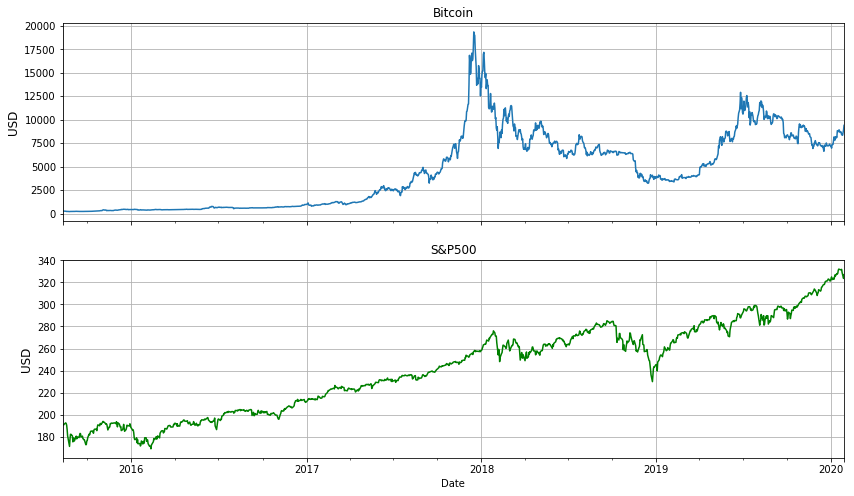

In [49]:
fig = plt.figure(figsize=(14, 8))
ax1 = plt.subplot(211)
btc['BTC_close'].plot()
plt.title('Bitcoin')
plt.ylabel('USD', fontsize=12)
plt.grid()

# Share the same axis
ax2 = plt.subplot(212, sharex = ax1)
s_500.plot(color='g')
plt.title('S&P500')
plt.ylabel('USD', fontsize=12)
plt.grid()
plt.show()

In [50]:
#pep = btc['BTC_close']
pep = s_500

In [51]:
# This indicates whether we have a position on or not
inpos = 0

# Hold for 60 days
hold_period = timedelta(60)

wait = 0

# This is the PnL
pnl = []
pos = []
time_in_trade = []

In [52]:
for date in pep.index:
    
    if inpos == 0 and wait == 2:
        entry_price = pep[date]
        open_time = date
        inpos = 1
        
    elif inpos == 1 and date-open_time >= hold_period:
        #Profit/loss for this trade
        p = pep[date] - entry_price
        pnl.append(p)
        inpos = 0
    
    elif inpos == 0 and wait < 2:
        wait += 1
        
    pos.append(inpos)

In [53]:
# Daily return
pos1 = [0] + pos 
daily_ret = pep.pct_change()*pos1[:-1]

In [54]:
# Annualised Sharpe ratio
sharpe = np.mean(daily_ret)/np.std(daily_ret)*np.sqrt(252)
sharpe

0.9973742537764174